In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn

mnist = tf.keras.datasets.mnist

# Plan de Classification
[ ] Intro Classification

[x] Perceptron

[ ] Multilayer

[ ] Other models (SVM, Bayesian...)


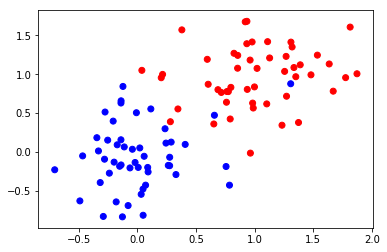

In [22]:
# Creating some toy data

centroids = np.array([[0, 0], [1, 1]])
labels = np.array([0, 1])
x = []
y = []

n = 100

for p, l in zip(centroids, labels):
    x.extend( np.concatenate((np.random.normal(p[0], 0.4, n//2), 
                              np.random.normal(p[1], 0.4, n//2))).reshape(2, n//2).T)
    y.extend([l] * (n//2))
    
x = np.array(x)
y = np.array(y)

plt.scatter(x[..., 0], x[..., 1], c=['b' if l==0 else 'r' for l in y])

## Perceptron

Modèle très simple en 2 diemensions :
![title](img/perceptron.png)

* $x_1$ et $x_2$ les coordonnées d'un point
* $w_1$, $w_2$ et $b$ les paramètres du modèle
* $f$ est la fonction heaviside ($0$ si $x < 0$, $1$ sinon)
* $y$ est la sortie du modèle pour l'entrée $\textbf{x}$

On utilise l'équation d'apprentissage suivante :
$$
\theta^{n+1} = \theta^n - \eta\nabla_\theta E(y, t)
$$

Où $E$ désigne l'erreur commise par le modèle :
$$
E(y, t) = y - t
$$


In [ ]:
# Perceptron
"""
Ici on va tout coder de bout en bout pour un modèle simple.
"""

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.2205 - acc: 0.9340
Epoch 2/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.0975 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0693 - acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0530 - acc: 0.9825
Epoch 5/5
10000/10000 [==============================] - 2s 171us/step


[0.06619428644063882, 0.9802]